# Principal Component Analysis(PCA) using sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.58030,0.22480,0.3222,0.08009
45,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185
535,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.06251,...,24.30,25.48,160.20,1809.0,0.1268,0.3135,0.44330,0.21480,0.3077,0.07569
436,12.87,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735


# Step 1: Scale the data -- mean centering

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
x_std = StandardScaler().fit_transform(df)


# Step 2: Apply Sklearn PCA Decomposition function to get Principal Components and new features

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA()

In [12]:
x_pca=pca.fit_transform(x_std)

In [13]:
x_std.shape

(569, 30)

In [14]:
x_pca.shape

(569, 30)

In [15]:
x_pca


array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

# Let's visualize the the transformed data in 2D

Text(0, 0.5, 'Second principle component')

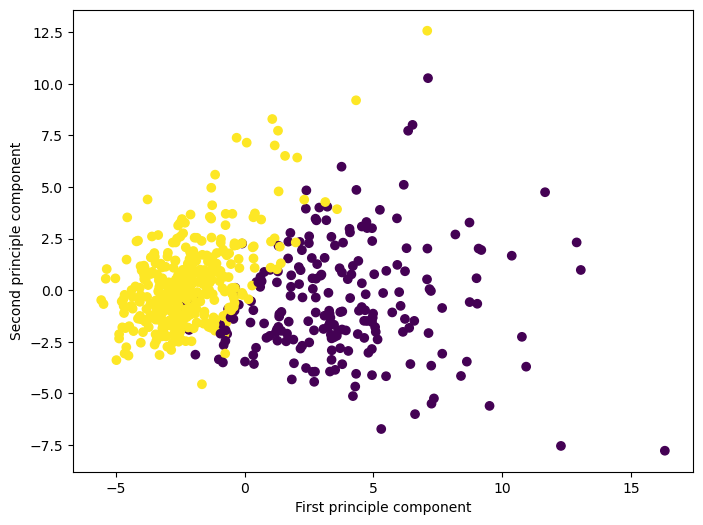

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [17]:
pca.components_.shape

(30, 30)

In [18]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

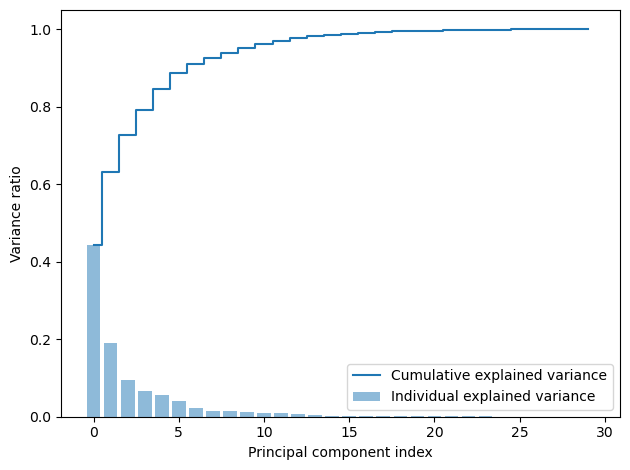

In [19]:
# Determine explained variance

var_exp=pca.explained_variance_ratio_

# Plot the explained variance against cumulative explained variance

import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Suppose we want to apply PCA such a way that 90 % of the total variance of the data is preserved

In [37]:
pca=PCA()

In [38]:
x_pca=pca.fit_transform(x_std)

In [39]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

# Let's see how many principal components are required to preserve 95% variance

In [40]:
d=np.argmax(cumsum>=0.95)+1
d

10

In [56]:
pca=PCA(n_components=10)

In [57]:
x_pca=pca.fit_transform(x_std)

In [58]:
x_pca.shape

(569, 10)

In [62]:
pca.components_.shape

(10, 30)

# Transformed data

In [61]:
x_pca.shape

(569, 10)